In [39]:
import pandas as pd
#from google.colab import files
#uploaded = files.upload()


## Importing packages
We import our standard libraries at this top
level.

In [40]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

As one of the import statements above is quite a long line, we inserted a line break `\` to
ease readability.

We will also use some functions written for the labs in this book in the `ISLP`
package.

In [41]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [42]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


## Simple Linear Regression


In [43]:
auto = load_data('Auto')

In [44]:
auto = pd.DataFrame(auto)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [45]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

## Equation : y^=β0+β1x

In [46]:
np.ones(auto.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [47]:
X = pd.DataFrame({'intercept': np.ones(auto.shape[0]),
                  'horsepower': auto['horsepower']})
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [48]:
y = auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

We extract the response, and fit the model.

In [49]:
summarize(results)


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [50]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        23:07:26   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the
`params` attribute of `results`.

In [51]:
results.params


intercept     39.935861
horsepower    -0.157845
dtype: float64

In [52]:
design = MS(['horsepower'])
X = design.fit_transform(auto)
X[:4]
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX


,intercept,horsepower
0,1.0,98


In [53]:
design

ModelSpec(terms=['horsepower'])

Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [54]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean


array([24.46707715])

We can produce confidence intervals for the predicted values.

In [55]:
new_predictions.conf_int(alpha=0.05)


array([[23.97307896, 24.96107534]])

### Here's a predicted mean 24.46 and here's how confident I am in that estimate with 95% CI od [23.9, 24.96] 

Prediction intervals are computing by setting `obs=True`:

In [56]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[14.80939607, 34.12475823]])

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [57]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


 A few things are illustrated above. First we see the syntax for defining a function:
`def funcname(...)`. The function has arguments `ax, b, m`
where `ax` is an axis object for an exisiting plot, `b` is the intercept and
`m` is the slope of the desired line. Other plotting  options can be passed on to
`ax.plot` by including additional optional arguments as follows:

In [58]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


/var/folders/lc/n5fml4jd4019lskc2ndx44jh0000gn/T/ipykernel_30968/4107256521.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/lc/n5fml4jd4019lskc2ndx44jh0000gn/T/ipykernel_30968/4107256521.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


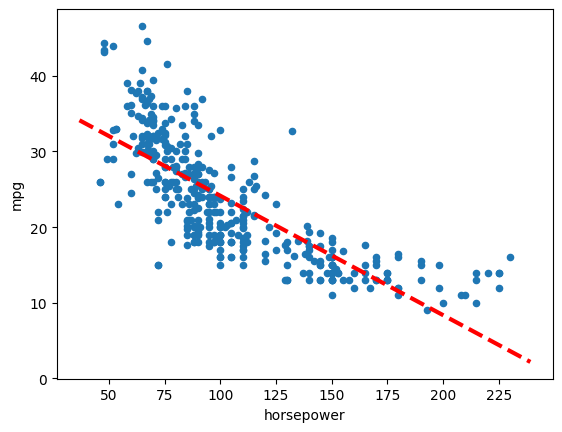

In [59]:
ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)


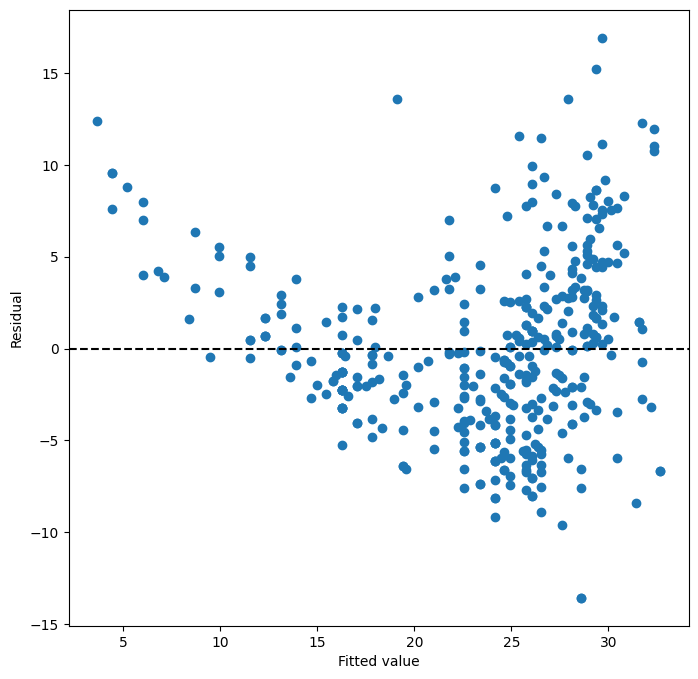

In [60]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


Text(0, 0.5, 'Residual')

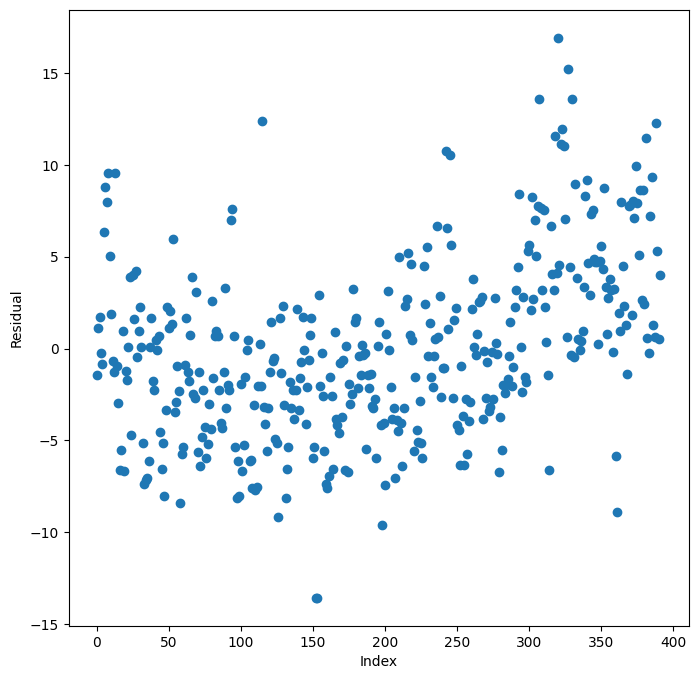

In [61]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), results.resid)
ax.set_xlabel('Index')
ax.set_ylabel('Residual')

